# Herkenning van handgeschreven cijfers met Deep Learning 2

## Convolutionele Neurale Netwerken

Stijn Oomes

donderdag 15 september 2022

## Info CNN
- Convolutional Neural Networks (CNN) zijn diepere neurale netwerken die veel gebruikt worden in beeldherkenning. CNN's werken door het toepassen van convolutielagen, poolinglagen en volledig verbonden lagen om kenmerken te extraheren en te classificeren.

## Importeer libraries

In [55]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

## Verover de data

In [56]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [57]:
train_images.shape

(60000, 28, 28)

In [58]:
train_labels.shape

(60000,)

## Prepareer de images

* normalizeren --> pixel waardes tussen 0.0 en 1.0
* reshapen --> extra dimensie!

In [59]:
train_images.shape

(60000, 28, 28)

In [60]:
train_images_normalized = train_images.astype('float32')/255

In [61]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [62]:
train_images_enhanced.shape

(60000, 28, 28, 1)

Doe hetzelfde met de test images:

In [63]:
test_images_normalized = test_images.astype('float32')/255


In [64]:
test_images_enhanced = test_images_normalized.reshape(10000,28,28,1)

In [65]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [66]:
train_labels
print(train_labels)
print(to_categorical(train_labels))

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [67]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [68]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [69]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Definieeer netwerk / model

**OPDRACHT**: voeg nog 1 convolutie laag en nog 1 volledig verbonden ("Dense") laag toe

In [70]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))
cnn.add(AveragePooling2D())

# Conv2D convolution layer (e.g. spatial convolution over images).
#This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.
cnn.add(Conv2D(filters=64,
                         kernel_size=(3, 3),
                         activation='relu'))
#AveragePooling2D Downsamples the input along its spatial dimensions (height and width) by taking the average value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.
#The resulting output when using "valid" padding option has a shape (number of rows or columns) of: output_shape = math.floor((input_shape - pool_size) / strides) + 1 (when input_shape >= pool_size)
cnn.add(AveragePooling2D())

cnn.add(Flatten())
cnn.add(Dropout(0.5))

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

In [71]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_3 (Averag  (None, 13, 13, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_4 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [72]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

**OPDRACHT**: meet hoe lang het trainen duurt, niet met %%timeit maar met time.time().


In [73]:
import time
start = time.time()
history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 3, # varieer het aantal epochs
        batch_size = 128,
        validation_data = (test_images_enhanced, test_labels_encoded))
print(time.time() - start)

Epoch 1/3
469/469 [==============================] - 7s 14ms/step - loss: 0.3285 - accuracy: 0.9022 - val_loss: 0.0968 - val_accuracy: 0.9700
Epoch 2/3
469/469 [==============================] - 6s 14ms/step - loss: 0.1122 - accuracy: 0.9659 - val_loss: 0.0560 - val_accuracy: 0.9821
Epoch 3/3
469/469 [==============================] - 6s 14ms/step - loss: 0.0824 - accuracy: 0.9742 - val_loss: 0.0463 - val_accuracy: 0.9857
19.743664979934692


**OPDRACHT**: meet hoe lang het testen duurt, niet met %%timeit maar met time.time().

In [78]:
start = time.time()
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)
print(f'time: {time.time() - start}')
print(acc )


313/313 [==============================] - 1s 2ms/step - loss: 0.0463 - accuracy: 0.9857
time: 0.5244736671447754
0.9857000112533569


**OPDRACHT**: voeg labels aan deze grafiek toe

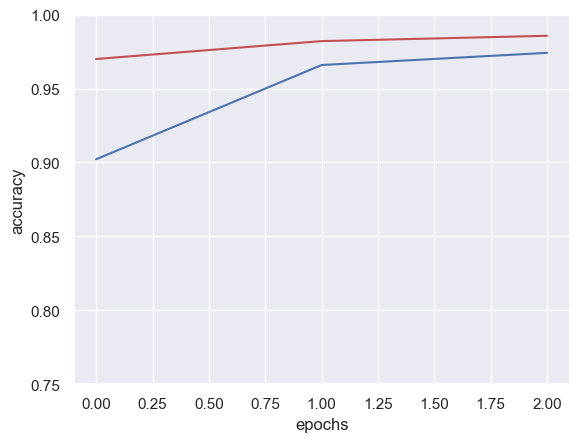

In [77]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
#attaching labels
plt.xlabel('epochs')
plt.ylabel('accuracy');
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
    * vrij goed
* is het netwerk onder- of over-trained?
    * misschien under trained want de rode lijn blijft boven de blauwe
* laat een paar fouten zien
    * De fouten zijn vaak de cijfers die onhandige openingen hebben
![alt text](fout.png)
* wat is sneller: het trainen of het testen?
    * testen
* wat kun je nog doen om de nauwkeurigheid te verhogen?
    * Meer fotos van cijfers toevoegen
    * spelen met het aantal lagen en filters om de nauwkeurigheid te verhogen
    * De ai van zijn fouten laten leren

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
    * CNN behaalt veel betere scores
        * CNN: 0.9857 test score
        * KNN: 0.919 test score
* welke type fouten maken de verschillende classifiers?
*  KNN
    Overfitting: kNN kan te gevoelig zijn voor kleine variaties in de trainingsset, waardoor het zich aanpast aan ruis en overfitting kan veroorzaken.
    Onderfitting: als k te groot is, kan kNN een te algemene classificatie geven en onderfitting veroorzaken.
    Onbalans: als er onbalans is in de trainingsset, kan kNN neigen naar de meest voorkomende klasse en de minder voorkomende klasse verkeerd classificeren.
*  CNN
    Overfitting: net als bij kNN kunnen CNN's te gevoelig zijn voor ruis en overfitting veroorzaken als de trainingsset te klein is of als er te veel parameters in het model zijn.
    Onvoldoende trainingsgegevens: als er niet genoeg trainingsgegevens zijn, kan het moeilijk zijn voor het model om relevante kenmerken te leren en kan het resulteren in slechte prestaties.
    Slechte kwaliteit trainingsgegevens: als de trainingsgegevens van slechte kwaliteit zijn, kan het model ook slechte prestaties leveren.

